In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Solow Model

## Recap

In this notebook, we perform a simulation for a continuous-time Solow model. For simplicity we assume that the production function is of the Cobb-Douglas type, i.e.

\begin{align}
  Y(t) = K(t)^\alpha [A(t) L(t)]^{1-\alpha}
\end{align}

For an explanation of Cobb-Douglas functios, see [[02 Cobb-Douglas Production Function]](/notebooks/02 Cobb-Douglas Production Function.ipynb), from which we borrow the implementation. 

Under the assumptions of the Solow model, the yield is divided into consumption and saving by an exogenously given fraction $s$, i.e.,

\begin{align}
  S(t) &= s Y(t), \\
  C(t) &= (1 - s) Y(t).
\end{align}

Saving is identical to investment, i.e.

\begin{align}
  I(t) = S(t)
\end{align}


The capital accumulation equation is as follows.

\begin{align}
  \dot K (t) = I(t) - \delta K(t)
\end{align}

Discretize this equation with small increment of time $\Delta t$ as 

\begin{align}
   K(t + \Delta t) = K(t) + (I(t) - \delta K(t)) \Delta t, 
\end{align}
where the last term represents the net invest during $[t,t+\Delta t]$.


Similarly, we can write down the discretized growth equations for $A$ and $L$:

\begin{align}
  A(t+\Delta t)&=(1+g\Delta t)A(t),\\
  L(t+\Delta t)&=(1+n\Delta t)L(t).
\end{align}

To simplify notation, define

\begin{align}
  K_\tau &= K(t + \tau \Delta t),\\
  A_\tau &= A(t + \tau \Delta t),\\
  L_\tau &= L(t + \tau \Delta t),
\end{align}

where $\tau = 0, 1, 2, \dots$ ($\tau$ = tau)

The difference equations we compute are listed below:

\begin{align}
  K_{\tau+1} &= s F(K_\tau, A_\tau L_\tau) \Delta t + (1 - \delta \Delta t) K_\tau, \\
  A_{\tau+1} &= (1 + g\Delta t) A_\tau, \\
  L_{\tau+1} &= (1 + n\Delta t) L_\tau
\end{align}

### Blanced growth

The balanced growth path is a path along which capital per unit of effective labor is constant. For the Cobb-Douglas case, it satisfies  

\begin{align}
  \left(
    \frac{K^*(t)}{A(t) L(t)}
  \right)^{\alpha-1}
   = \frac{g + n + \delta}{s}
\end{align}

and thus 

\begin{align}
  K^*(t) = A(t) L(t) \left(\frac{g + n + \delta}{s}\right)^\frac{1}{\alpha - 1}.
\end{align}

In order for the initial capital stock to lie on the balanced growth path, it must hold that 

\begin{align}
  K^*(0) = A(0) L(0) \left(\frac{g + n + \delta}{s}\right)^\frac{1}{\alpha - 1}.
\end{align}

## Simulation

Simulation for the Solow model is easily done.

We firstly set the following parameters.

- Model paramters: 
  - Exogenous parameters: $\alpha$, $g$, $n$, $s$ and $\delta$
  - Initial conditions: $K_0=K(0)$, $A_0=A(0)$, $L_0=L(0)$
- Simulation parameter: 
  - End of simulation: $T$
  - Number of division: $N$
  - $\Delta t = T/N$
  
We don't use the instrumental variable, $k(t)$, because it is not particularly useful for a simulation. 

### Implementation

In [195]:
# Parameters
alpha = 0.33
g, n, delta = 0.01, 0.01, 0.15
s = 0.3


# Grid for the time axis
T = 40
N_per_year = 1000
N = N_per_year * T

t = [0.0]
dt = 1 / N_per_year
for i in range(N-1):
    t.append(t[-1] + dt)

def F(K, AL):
    """production function (cobb-douglas)"""
    return K**alpha * (AL)**(1-alpha)

def solow_update(stock_var, s):
    """compute the end-of-period stock variables"""
    K, A, L = stock_var
    K1 = s * F(K, A*L) * dt + (1 - delta * dt) * K
    A1 = (1 + g * dt) * A
    L1 = (1 + n * dt) * L
    
    return (K1, A1, L1)

def balanced_growth_capital(A, L, s):
    """compute the balanced growth initial stock"""
    return A*L * ((g + n + delta)/s)**(1/(alpha-1))


# Initial conditions set arbitrarily
A0, L0 = 1, 1
K0 = 0.4 * balanced_growth_capital(A0, L0, s)
K, A, L = [K0], [A0], [L0]

# Stock variables

for i in range(N-1):
    stock_vars = (K[-1], A[-1], L[-1])  # K[-1] is the last entry of list K
    K1, A1, L1 = solow_update(stock_vars, s)
    
    K.append(K1)   # list.append(a) appends a as the last entry of the list
    A.append(A1)
    L.append(L1)


# Variables of interest

Y = []   # Aggregte Income
C = []   # Aggregate Consumption
I = []   # Aggregate Investment
KL = []  # Per-capita Capital
YL = []  # Per-capita Income
CL = []  # Per-capita Consumption
IL = []  # Per-capita Investment

for K0, A0, L0 in zip(K, A, L):   # Google how zip() works
    KL.append(K0 / L0)
    
    # Income
    Y0 = F(K0, A0*L0)
    Y.append(Y0)
    YL.append(Y0 / L0)
    
    # Consumption
    C0 = (1 - s) * Y0
    C.append(C0)
    CL.append(C0/L0)
    
    # Investment
    I0 = s * Y0
    I.append(I0)
    IL.append(I0/L0)    

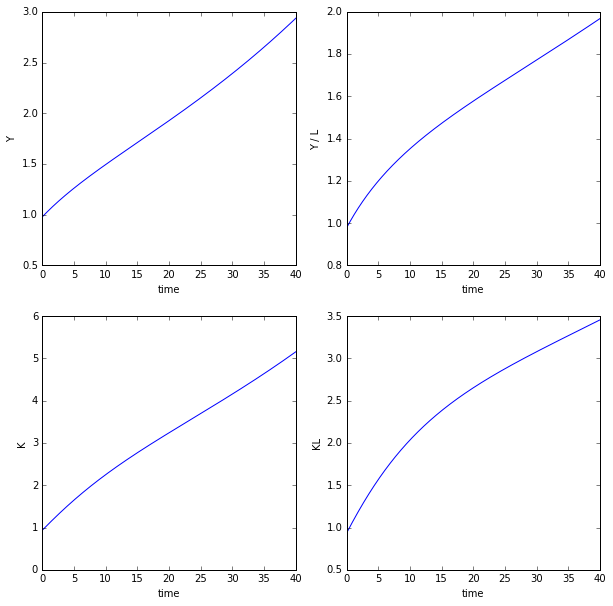

In [146]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].plot(t, Y)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('Y')

ax[0,1].plot(t, YL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('Y / L')

ax[1,0].plot(t, K)
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('K')

ax[1,1].plot(t, KL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('KL')


In performing the simulation we set the initial capital to be 40% of the balanced growth level of capital. It is considered to be the situation in many developing countries. As you can see in the above figures, growth rates in the early stage of the economy are high and they gradually slow down to the balanced growthlevel.  

### Policy Change

Let's consider an economy on the balanced growth path, i.e.

In [230]:
s0 = 0.3

A0, L0 = 1, 1
K0 = balanced_growth_capital(A0, L0, s0)

Suppose a policy that will increase the saving rate to $s=0.4$ in 2 years after the beginning of the analysis.

In [231]:
s1 = 0.35

Let's observe the dynamics of the economy.

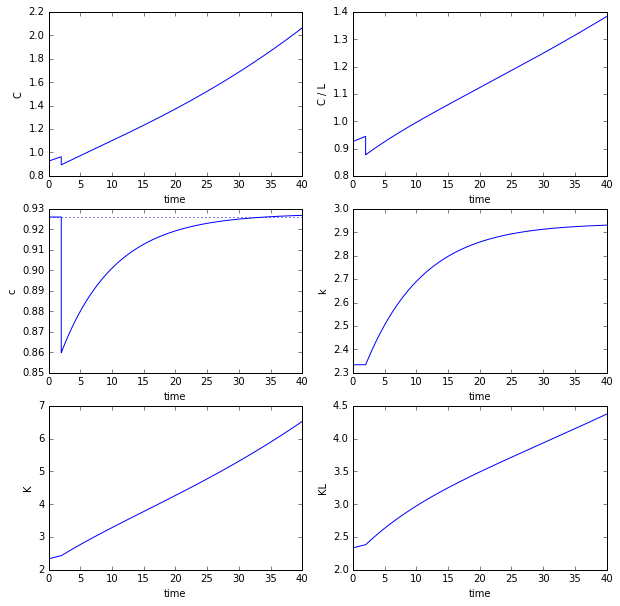

In [232]:
# Stock variables
K, A, L = [K0], [A0], [L0]
sr = [s0]

for i in range(N-1):
    stock_vars = (K[-1], A[-1], L[-1])  # K[-1] is the last entry of list K
    
    if i < 2 * N_per_year:  # In 2 years, the saving rate raises.
        s = s0
    else:
        s = s1
        
    K1, A1, L1 = solow_update(stock_vars, s)
    
    K.append(K1)   # list.append(a) appends a as the last entry of the list
    A.append(A1)
    L.append(L1)
    sr.append(s)  # save the saving rate for later usage

# Variables of interest

C = []   # Aggregte Consumption
CL = []  # Per-capita Consumption
KL = []  # Per-capita Capital

CAL = [] # Consumption per unit of effective labor
KAL = [] # Capital per unit of effective labor

for K0, A0, L0, s in zip(K, A, L, sr): 
    KL.append(K0 / L0)
    
    # Consumption
    C0 = (1-s) * F(K0, A0*L0)
    C.append(C0)
    CL.append(C0 / L0)
    
    CAL.append(C0 / (L0 * A0))
    KAL.append(K0 / (L0 * A0))
    
    
# Plotting

fig, ax = plt.subplots(3, 2, figsize=(10,10))

ax[0,0].plot(t, C)
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('C')

ax[0,1].plot(t, CL)
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('C / L')

ax[1,0].plot(t, CAL)
ax[1,0].axhline(CAL[0], linestyle='dotted')
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('c')

ax[1,1].plot(t, KAL)
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('k')

ax[2,0].plot(t, K)
ax[2,0].set_xlabel('time')
ax[2,0].set_ylabel('K')

ax[2,1].plot(t, KL)
ax[2,1].set_xlabel('time')
ax[2,1].set_ylabel('KL')


### Observation

For 2 years from the beginning, the economy is on the balanced growth path and we observethat $c$ and $k$ stay constant. The policy change increases the saving and thus reduces consumption temporarily. The economy experiences expansion and gradually recovers the level of consumption per unit of effective labor. The aggregate consumption and consumption per capita. 

It is difficult to see from these figures but the growth rate of $C/L$ for example increases only temporarily. In the Solow model, policy change has level effect but not growth effect.